#### GA Insert Analysis

This code varies the masked section of pLac to see how it relates to the upper and lower bounds of the promoter's expression.

In [1]:
import numpy as np
import random

from function_modules.function_module import *
from function_modules.evaluation_module import *

In [2]:
# Shared directory to save results 
shared_data_dir = 'Data/analysis/'

# Genetic Algorithm parameters
kwargs = {
    'cnn_model_path': '../../Models/CNN_6_1_2.keras',
}
target_expressions = [0, 1]
lineages = 10

# pLac sequence
pLac_up = 'AATACTAGAGGTCTTCCGAC'
pLac_change = 'TTTACACTTTATGCTTCCGGCTCGTATGTT'
pLac_down = 'GTGTGGGCGGGAAGACAACTAGGGG'


# Set seed
seed = 0
random.seed(seed)

# Generate random masks
test_cases = 10
mask_counts = np.linspace(1, len(pLac_change), test_cases, dtype=int)

In [3]:
def replace_sequence(seq, n):
    indices_to_replace = random.sample(range(len(seq)), n)
    return ''.join([seq[i] if i not in indices_to_replace else 'N' for i in range(len(seq))])

In [4]:
param_ranges = {
    'masked_sequence' : [pLac_up + replace_sequence(pLac_change, mask) + pLac_down for mask in mask_counts]
}
results_df = test_params(param_ranges, target_expressions, lineages, kwargs)
results_df['mask_length'] = results_df['masked_sequence'].str.count('N')

results_df.to_csv(f'{shared_data_dir}random_inserts.csv', index=False)

Processing combinations:   0%|          | 0/200 [00:00<?, ?it/s]

Instructions for updating:
Use tf.identity with explicit device placement instead.


c:\Users\rsore\anaconda3\envs\TX_prediction\Lib\site-packages\keras\src\saving\saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'adam', because it has 34 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
Processing combinations: 100%|██████████| 200/200 [11:04<00:00,  3.32s/it, Elapsed=11.08min, ETA=0.00s] 


Optimal mask_length for prediction: 7 (Minimum prediction: 0.344)
Relationship between mask_length and prediction:
  - Correlation Coefficient (r): 0.210
  - p-value: 2.790e-03
  - Significant

Optimal mask_length for run_time: 1 (Minimum run_time: 0.421)
Relationship between mask_length and run_time:
  - Correlation Coefficient (r): 0.938
  - p-value: 2.204e-93
  - Significant



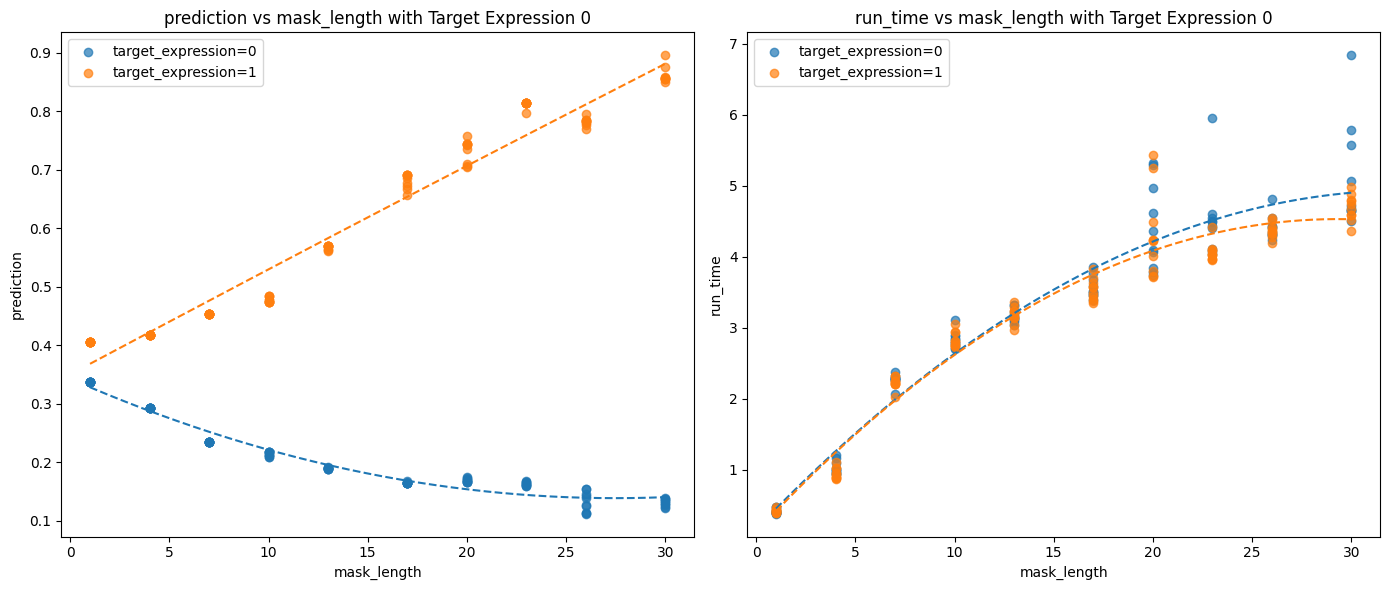

In [4]:
# Read results (if necessary) and plot
results_df = pd.read_csv(f'{shared_data_dir}random_inserts.csv')

scatter_plot_overlaid(results_df, 0, 'mask_length', 'target_expression', metric1='prediction', polynomial_degree=2)

## Maximum/minimum expression for each nucleotide

---

In [5]:
pLac = pLac_up + pLac_change + pLac_down

In [5]:
# Test with individual nucleotide masks
masked_sequences = {
    i : pLac[:i] + 'N' + pLac[i+1:] for i in range(len(pLac))
}
results_df = test_combinatorial(masked_sequences, target_expressions, kwargs)
results_df.rename(columns={'element' : 'index'}, inplace=True)
results_df.to_csv(f'{shared_data_dir}individual_nucleotides.csv', index=False)

Processing combinations:   0%|          | 0/150 [00:00<?, ?it/s]c:\Users\rsore\anaconda3\envs\TX_prediction\Lib\site-packages\keras\src\saving\saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'adam', because it has 34 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Instructions for updating:
Use tf.identity with explicit device placement instead.


c:\Users\rsore\Documents\GitHub\promoter-sequence-transcription-rates\v2\Testing GA\GA_deap\GA\CNN.py:61: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\torch\csrc\utils\tensor_new.cpp:281.)
  tensor_sequences = torch.tensor(
Processing combinations: 100%|██████████| 150/150 [00:18<00:00,  8.16it/s, Elapsed=18.38s, ETA=0.00s]


In [6]:
# Read results (if necessary) and plot
results_df = pd.read_csv(f'{shared_data_dir}individual_nucleotides.csv')
results_df.head()

,algorithm,index,masked_sequence,mask_length,target_expression,sequence,error,prediction,run_time
0,Combinatorial Algorithm,0,NATACTAGAGGTCTTCCGACTTTACACTTTATGCTTCCGGCTCGTA...,1,0,CATACTAGAGGTCTTCCGACTTTACACTTTATGCTTCCGGCTCGTA...,0.318464,0.318464,0.047547
1,Combinatorial Algorithm,0,NATACTAGAGGTCTTCCGACTTTACACTTTATGCTTCCGGCTCGTA...,1,1,TATACTAGAGGTCTTCCGACTTTACACTTTATGCTTCCGGCTCGTA...,0.634442,0.365558,0.011004
2,Combinatorial Algorithm,1,ANTACTAGAGGTCTTCCGACTTTACACTTTATGCTTCCGGCTCGTA...,1,0,AATACTAGAGGTCTTCCGACTTTACACTTTATGCTTCCGGCTCGTA...,0.337836,0.337836,0.012151
3,Combinatorial Algorithm,1,ANTACTAGAGGTCTTCCGACTTTACACTTTATGCTTCCGGCTCGTA...,1,1,ACTACTAGAGGTCTTCCGACTTTACACTTTATGCTTCCGGCTCGTA...,0.653965,0.346035,0.011023
4,Combinatorial Algorithm,2,AANACTAGAGGTCTTCCGACTTTACACTTTATGCTTCCGGCTCGTA...,1,0,AATACTAGAGGTCTTCCGACTTTACACTTTATGCTTCCGGCTCGTA...,0.337836,0.337836,0.009999


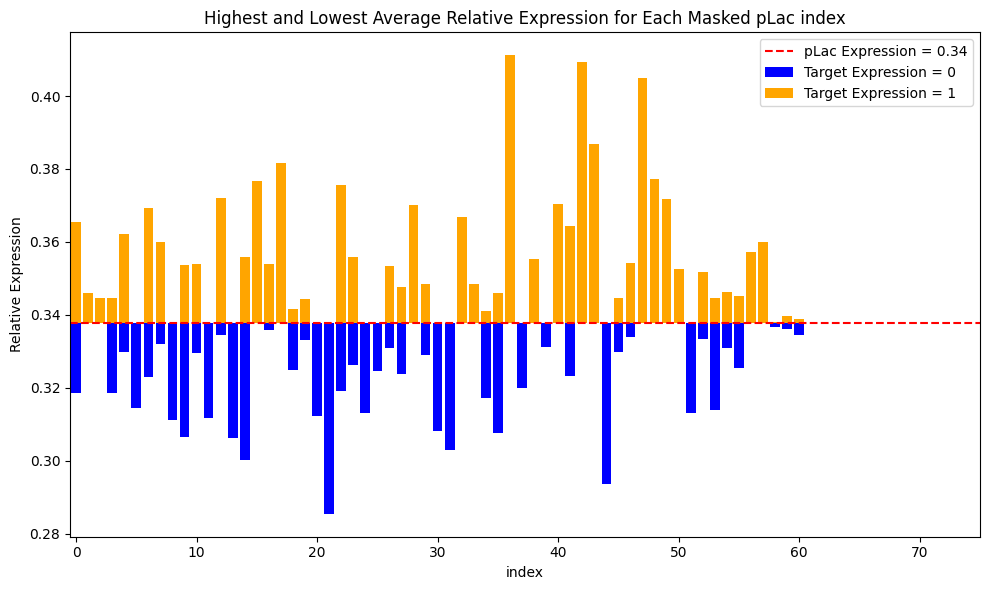

In [7]:
contribution_bar_graph(results_df, independent_variable='index', axhline=True, text=False, xlim=(-0.5, 75), ylim=None)

## Maximum/minimum expression for each element

---

In [8]:
pLac_elements = {
    'UP' : 'AATACTAGAGGTCTTCCGAC',
    'h35' : 'TTTACA',
    'spacs' : 'CTTTATGCTTCCGGCTCG',
    'h10' : 'TATGTT',
    'disc' : 'GTGTGGGC',
    'ITR' : 'GGGAAGACAACTAGGGG',
}
order = ['UP', 'h35', 'spacs', 'h10', 'disc', 'ITR']

# mask one element at a time
masked_sequences = {}
for i, element in enumerate(order):
    up = ''.join([pLac_elements[order[j]] for j in range(i)])
    mask = 'N' * len(pLac_elements[element])
    down = ''.join([pLac_elements[order[j]] for j in range(i+1, len(order))])
    masked_sequences[element] = up + mask + down

In [5]:
# Test with each element masked
results_df = test_genetic(masked_sequences, target_expressions, lineages, kwargs, to_csv=f'{shared_data_dir}masked_elements.csv')

Processing combinations:   0%|          | 0/120 [00:00<?, ?it/s]

Instructions for updating:
Use tf.identity with explicit device placement instead.


c:\Users\rsore\anaconda3\envs\TX_prediction\Lib\site-packages\keras\src\saving\saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'adam', because it has 34 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
Processing combinations: 100%|██████████| 120/120 [05:08<00:00,  2.57s/it, Elapsed=5.15min, ETA=0.00s] 


In [9]:
# Read results (if necessary) and plot
results_df = pd.read_csv(f'{shared_data_dir}masked_elements.csv')
results_df.head()

,algorithm,element,masked_sequence,mask_length,target_expression,lineage,sequence,error,prediction,run_time
0,Genetic Algorithm,UP,20,20,0,0,GCAGACGCCACGCAGAACGGTTTACACTTTATGCTTCCGGCTCGTA...,0.156166,0.156166,3.057213
1,Genetic Algorithm,UP,20,20,0,1,GCAGACGCCAGCCCGAATCATTTACACTTTATGCTTCCGGCTCGTA...,0.157232,0.157232,2.638269
2,Genetic Algorithm,UP,20,20,0,2,GTACCAGCTCATTCGAAGCGTTTACACTTTATGCTTCCGGCTCGTA...,0.161052,0.161052,3.779105
3,Genetic Algorithm,UP,20,20,0,3,GCAGACGCCACGCAGAACGGTTTACACTTTATGCTTCCGGCTCGTA...,0.156166,0.156166,3.326572
4,Genetic Algorithm,UP,20,20,0,4,GTACGCGCTACGTGAAACGGTTTACACTTTATGCTTCCGGCTCGTA...,0.166854,0.166854,2.700085


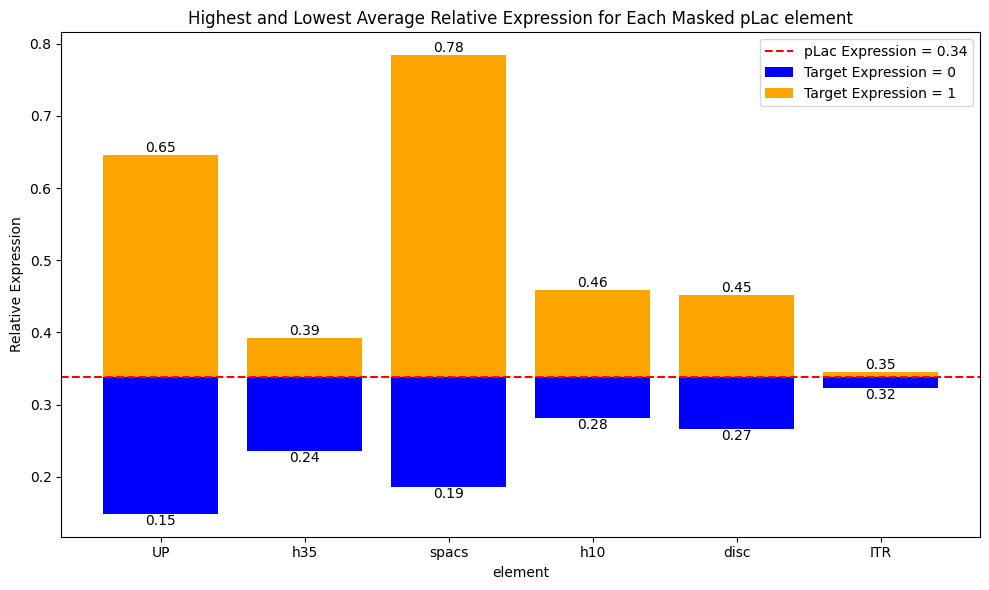

In [10]:
# Filter for best results
filtered_df = results_df.loc[results_df.groupby(['element', 'target_expression'])['error'].idxmin()]
contribution_bar_graph(filtered_df, independent_variable='element', axhline=True, text=True, xlim=None, ylim=None, order=order)

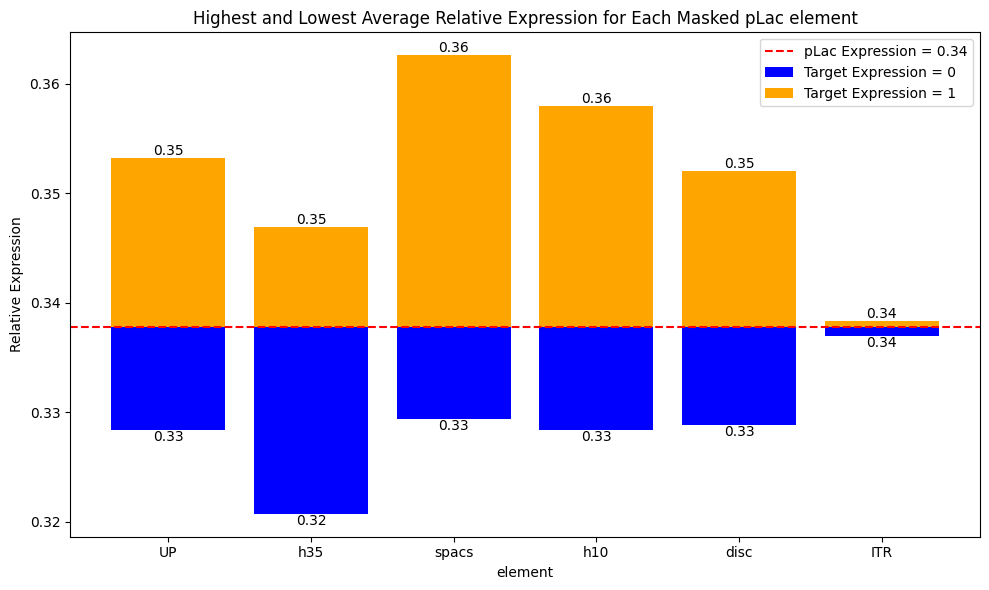

In [11]:
# Normalize to show average contribution of each nucleotide in each element
pLac_expr = 0.33783603
relative_df = filtered_df.copy()
relative_df['prediction'] = ((filtered_df['prediction'] - pLac_expr) / filtered_df['mask_length']) + pLac_expr
contribution_bar_graph(relative_df, independent_variable='element', axhline=True, text=True, xlim=None, ylim=None, order=order)